In [1]:
import shap
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from openpyxl import load_workbook

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Bibliotecas dos Modelos Utilizados

from sklearn.linear_model import LogisticRegression  # Regressão Logística.
from sklearn.svm import SVC                          # Máquinas de Vetores de Suporte (SVM).
from sklearn.neighbors import KNeighborsClassifier   # K-Vizinhos Mais Próximos
from sklearn.tree import DecisionTreeClassifier      # Árvore de Decisões de Classificação.
from sklearn.ensemble import RandomForestClassifier  # Floresta Aleatória.
from xgboost import XGBClassifier                    # Extreme Gradient Boosting.

In [3]:
# Análise de Dados
from sklearn.decomposition import PCA

# Treinamento
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Avalição
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Tuning
from sklearn.model_selection import GridSearchCV

# Análise de Dados

In [4]:
# Carregar o DataFrame a partir de um arquivo Excel
caminho_arquivo_excel = 'C:\\Users\\Andre\\Desktop\\Julia\\Mangue_Baja\\DESAFIO TÉCNICO\\anonymizedData.xlsx'
nome_da_pagina = 'P_Frenagem'  # Nome da página desejada

# Lê o arquivo Excel com todas as páginas/sheets
xl = pd.ExcelFile(caminho_arquivo_excel)

df = xl.parse(nome_da_pagina)

# Vê dados 
df.head()

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,DP_Comprimento,DP_Altura do CG com relacao ao chao,MV_Eixo dianteiro,MV_Eixo Traseiro,DMV_Dianteira,DMV_Lado Direito,...,CD_Distancia de frenagem de 35 a 0 em asfalto,CD_Distancia de frenagem de 35 a 0 em terra batida,CD_Ganho de rolagem por aceleracao lateral,CD_Ganho de arfagem em aceleracao longitudinal,CD_Ganho de arfagem em desaceleracao longitudinal,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Frenagem
0,1393.304461,1339.523445,1200.000000,568.132661,1898.902413,550.000000,69.725413,139.027996,0.380331,0.593223,...,NaN,NaN,NaN,NaN,NaN,NaN,42.139486,NaN,NaN,1
1,1447.028832,1330.136525,1361.481906,1505.363554,2079.855119,374.265277,74.859956,94.351698,0.411191,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1360.497021,1300.548245,1229.410830,2034.755114,2073.610993,525.174720,79.479623,98.184666,0.414025,0.562029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1375.720704,1285.067917,1267.613713,2238.367796,2017.352229,451.574651,65.639500,86.142680,0.416392,0.510369,...,NaN,NaN,3.899899,2.011436,3.056203,58.0,55.922387,7.163712,7.754569,1
4,1412.899313,1318.765014,1200.000000,1449.569054,2065.365531,534.234474,78.846482,115.531577,0.388342,0.522544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
# Informação básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   DP_Entre-Eixo                                            1000 non-null   float64
 1   DP_Bitola Dianteira                                      1000 non-null   float64
 2   DP_Bitola Traseira                                       1000 non-null   float64
 3   DP_Altura                                                1000 non-null   float64
 4   DP_Comprimento                                           1000 non-null   float64
 5   DP_Altura do CG com relacao ao chao                      990 non-null    float64
 6   MV_Eixo dianteiro                                        1000 non-null   float64
 7   MV_Eixo Traseiro                                         1000 non-null   float64
 8   DMV_Dianteira                

In [6]:
#Descrição de dados
df.describe()

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,DP_Comprimento,DP_Altura do CG com relacao ao chao,MV_Eixo dianteiro,MV_Eixo Traseiro,DMV_Dianteira,DMV_Lado Direito,...,CD_Distancia de frenagem de 35 a 0 em asfalto,CD_Distancia de frenagem de 35 a 0 em terra batida,CD_Ganho de rolagem por aceleracao lateral,CD_Ganho de arfagem em aceleracao longitudinal,CD_Ganho de arfagem em desaceleracao longitudinal,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Frenagem
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,990.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,190.000000,246.000000,199.000000,52.000000,47.000000,361.000000,239.000000,269.000000,203.000000,1000.000000
mean,1414.689573,1325.197441,1230.685720,1462.199118,2012.792230,533.455366,77.448493,106.433733,0.420762,0.518020,...,4.866361,6.659909,2.794650,4.371832,4.287474,48.491226,44.256078,9.574897,11.213208,3.000000
std,49.303501,57.410791,69.080035,274.704479,78.303872,94.490492,9.565263,13.577921,0.024451,0.039748,...,1.097647,1.621433,1.259943,2.384273,2.735442,4.300584,4.974943,4.240123,5.053376,1.414921
min,1300.000000,1160.000000,1001.679213,331.103164,1751.333046,281.512292,54.078316,75.323941,0.338735,0.430907,...,2.177447,2.540235,0.118343,0.063918,0.089211,40.202674,30.130178,4.361463,4.619092,1.000000
25%,1379.087330,1291.236460,1200.000000,1467.750920,1978.452521,491.470284,70.714219,96.804347,0.404308,0.493568,...,4.192360,5.674035,1.805570,2.366563,2.896546,45.293904,40.399058,7.147603,8.624562,2.000000
50%,1411.139536,1320.000000,1226.972267,1516.889689,2022.457086,532.313636,76.406716,105.973041,0.418524,0.504749,...,4.877446,6.919985,3.084259,4.154168,3.380386,48.025387,43.402995,8.856974,10.471005,3.000000
75%,1449.511627,1357.238924,1259.094740,1551.005478,2068.351679,567.986556,82.445708,114.476116,0.435471,0.539793,...,5.538014,7.979326,3.715745,5.964093,4.093407,51.605104,46.986548,10.635829,12.232718,4.000000
max,1549.242536,1508.215079,1489.476698,2358.734478,2176.943211,1058.500831,115.618182,172.880844,0.482233,0.709929,...,7.270000,9.629296,5.537192,10.767041,11.321442,62.823866,62.184199,30.955267,32.977558,5.000000


In [7]:
# Achar duplicatas
df.duplicated().sum()

0

In [8]:
# Achar valores nulos
df.isnull().sum()

DP_Entre-Eixo                                                0
DP_Bitola Dianteira                                          0
DP_Bitola Traseira                                           0
DP_Altura                                                    0
DP_Comprimento                                               0
DP_Altura do CG com relacao ao chao                         10
MV_Eixo dianteiro                                            0
MV_Eixo Traseiro                                             0
DMV_Dianteira                                                0
DMV_Lado Direito                                             0
PCG_X                                                        0
PCG_Y                                                        0
PCG_Z                                                        0
SD_Curso Positivo de projeto                               433
SD_Curso Negativo de projeto                               433
SD_Dimensoes dos pneus                                 

In [10]:
# Limpar o Dataset das colunas com muitos valores nulos

limite_nulos = 600 # Define o limite de valores nulos permitidos

# Remove as colunas com mais de limite_nulos valores nulos
df = df.dropna(thresh=len(df) - limite_nulos, axis=1)

# Checar 
df.isnull().sum()

DP_Entre-Eixo                            0
DP_Bitola Dianteira                      0
DP_Bitola Traseira                       0
DP_Altura                                0
DP_Comprimento                           0
DP_Altura do CG com relacao ao chao     10
MV_Eixo dianteiro                        0
MV_Eixo Traseiro                         0
DMV_Dianteira                            0
DMV_Lado Direito                         0
PCG_X                                    0
PCG_Y                                    0
PCG_Z                                    0
SD_Curso Positivo de projeto           433
SD_Curso Negativo de projeto           433
SD_Dimensoes dos pneus                   0
SD_Cambagem estatica                   164
SD_Convergência estatica               246
ST_Curso Positivo de projeto           433
ST_Curso Negativo de projeto           436
ST_Dimensoes dos pneus                   0
ST_Cambagem estatica                   201
ST_Convergência estatica               305
D_Relacao  

In [11]:
# Substituir valores nulos 
df.replace(np.nan,'0',inplace = True)

# Checar 
df.isnull().sum()

DP_Entre-Eixo                          0
DP_Bitola Dianteira                    0
DP_Bitola Traseira                     0
DP_Altura                              0
DP_Comprimento                         0
DP_Altura do CG com relacao ao chao    0
MV_Eixo dianteiro                      0
MV_Eixo Traseiro                       0
DMV_Dianteira                          0
DMV_Lado Direito                       0
PCG_X                                  0
PCG_Y                                  0
PCG_Z                                  0
SD_Curso Positivo de projeto           0
SD_Curso Negativo de projeto           0
SD_Dimensoes dos pneus                 0
SD_Cambagem estatica                   0
SD_Convergência estatica               0
ST_Curso Positivo de projeto           0
ST_Curso Negativo de projeto           0
ST_Dimensoes dos pneus                 0
ST_Cambagem estatica                   0
ST_Convergência estatica               0
D_Relacao                              0
D_Curso total da

In [12]:
# Manter todas as colunas em float
for coluna in df.columns:
    if df[coluna].dtype != float:
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

# Checar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DP_Entre-Eixo                        1000 non-null   float64
 1   DP_Bitola Dianteira                  1000 non-null   float64
 2   DP_Bitola Traseira                   1000 non-null   float64
 3   DP_Altura                            1000 non-null   float64
 4   DP_Comprimento                       1000 non-null   float64
 5   DP_Altura do CG com relacao ao chao  1000 non-null   float64
 6   MV_Eixo dianteiro                    1000 non-null   float64
 7   MV_Eixo Traseiro                     1000 non-null   float64
 8   DMV_Dianteira                        1000 non-null   float64
 9   DMV_Lado Direito                     1000 non-null   float64
 10  PCG_X                                1000 non-null   float64
 11  PCG_Y                          

In [14]:
# Verifique quais linhas têm mais de 10 valores iguais a zero
linhas_quase_nulas = df[(df == 0).sum(axis=1) > 20]

# Exiba as linhas que atendem à condição
print(linhas_quase_nulas.index)

# Exclua as linhas com base nos índices coletados
df = df.drop(linhas_quase_nulas.index)

# Exiba o DataFrame resultante
print(df)

Int64Index([], dtype='int64')
     DP_Entre-Eixo  DP_Bitola Dianteira  DP_Bitola Traseira    DP_Altura  \
0      1393.304461          1339.523445         1200.000000   568.132661   
1      1447.028832          1330.136525         1361.481906  1505.363554   
2      1360.497021          1300.548245         1229.410830  2034.755114   
3      1375.720704          1285.067917         1267.613713  2238.367796   
4      1412.899313          1318.765014         1200.000000  1449.569054   
..             ...                  ...                 ...          ...   
995    1339.843766          1346.968504         1246.560654   924.180270   
996    1339.089526          1380.357851         1246.393111   669.952762   
997    1337.638166          1313.913083         1232.045423  1540.791945   
998    1400.000000          1349.121854         1217.674135  1501.580522   
999    1361.110835          1385.156045         1238.253324  1003.928144   

     DP_Comprimento  DP_Altura do CG com relacao ao chao 

In [ ]:
# Especifique o caminho para o arquivo Excel
caminho_arquivo = "C:\\Users\\Andre\\Desktop\\Julia\\Mangue_Baja\\DESAFIO TÉCNICO\\Arquivo_Processado.xlsx"

# Salvar o DataFrame na planilha 'P_Aceleration'
df.to_excel(caminho_arquivo, sheet_name='P_Frenagem', index=False)

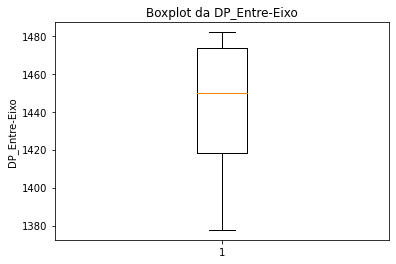

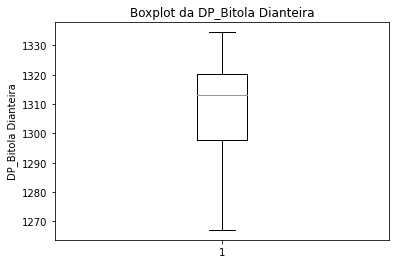

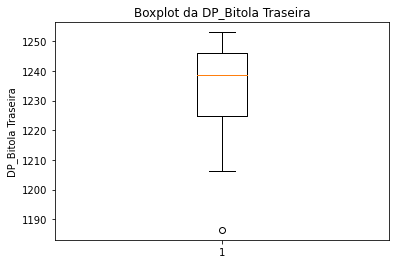

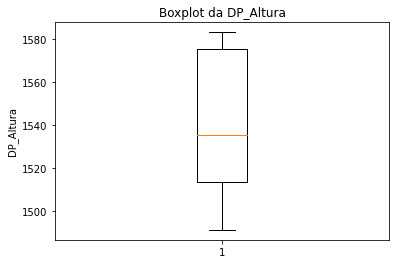

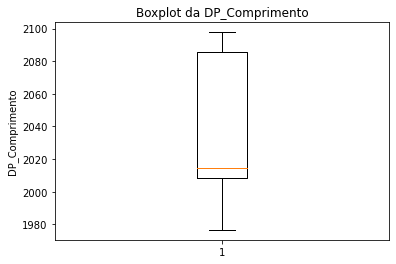

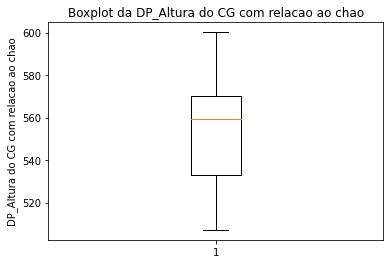

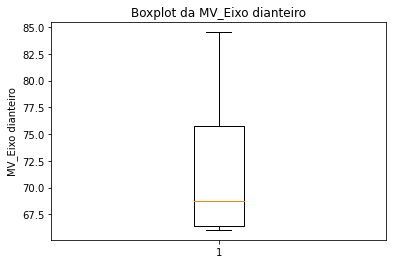

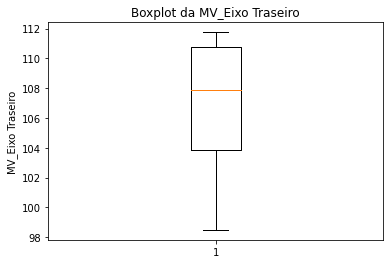

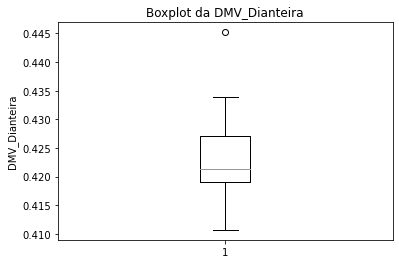

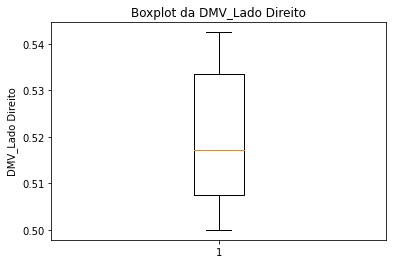

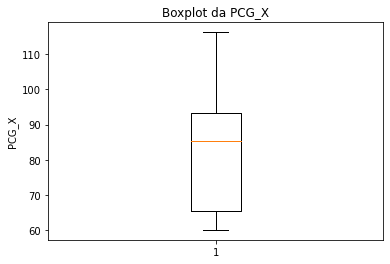

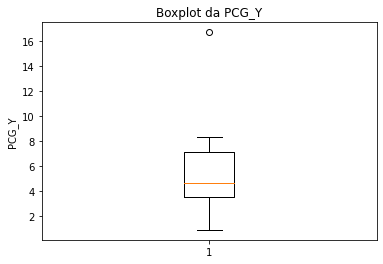

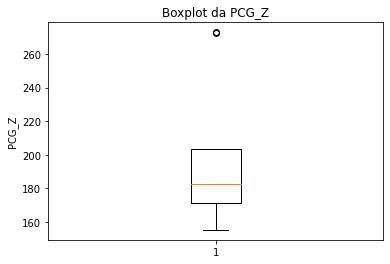

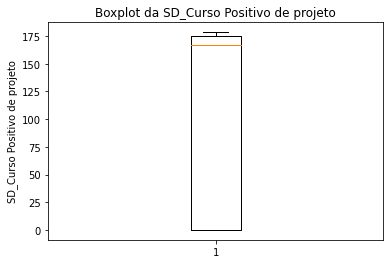

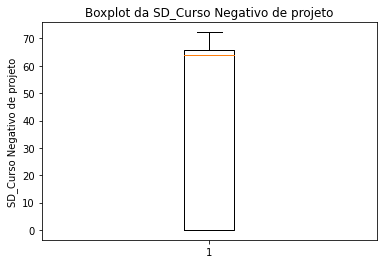

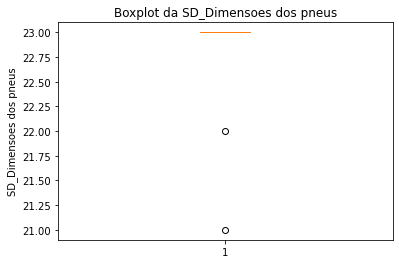

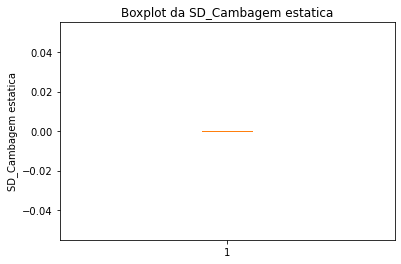

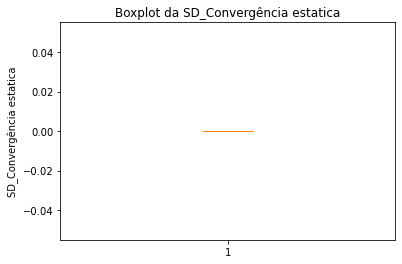

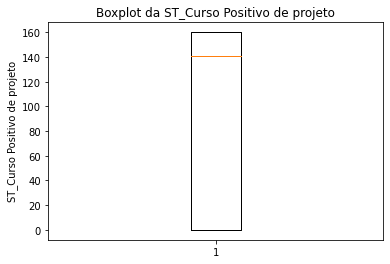

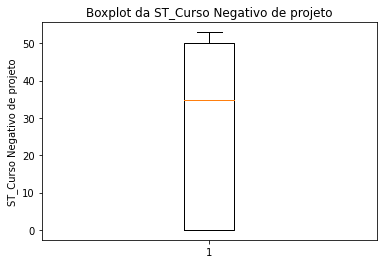

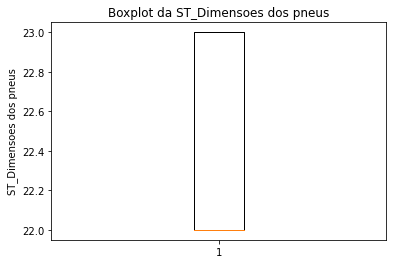

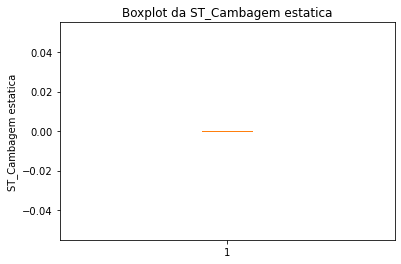

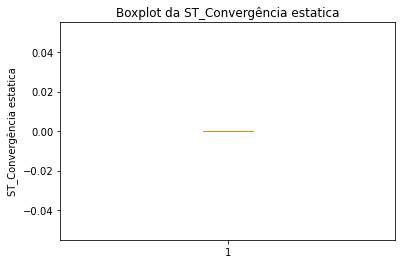

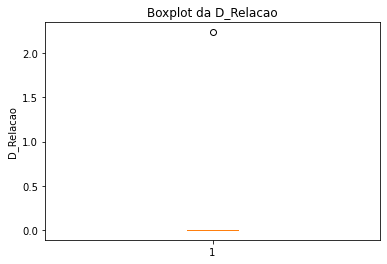

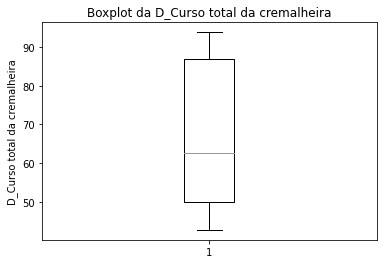

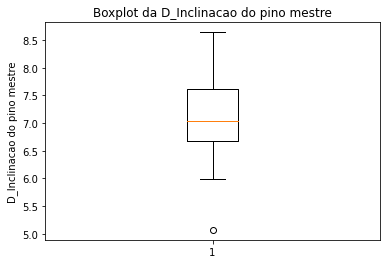

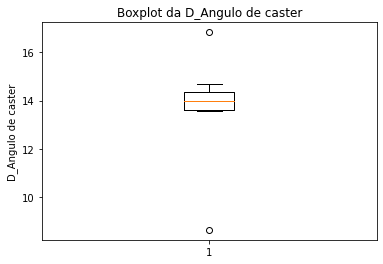

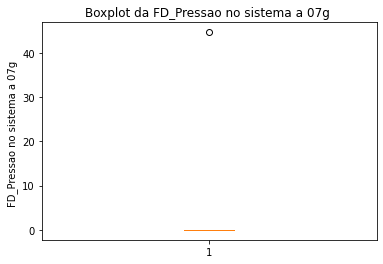

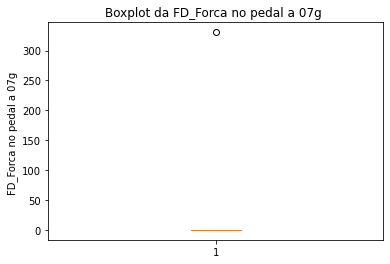

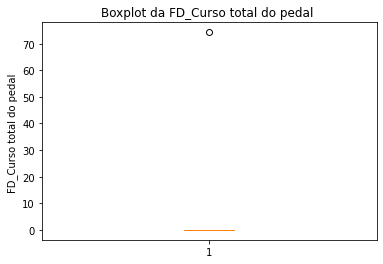

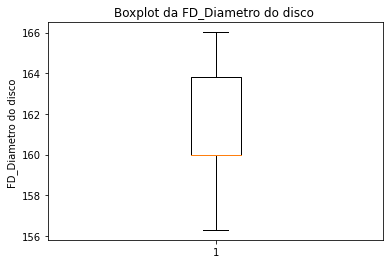

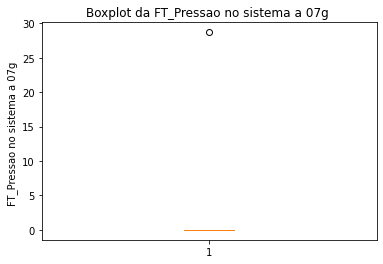

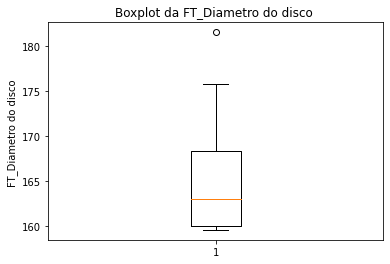

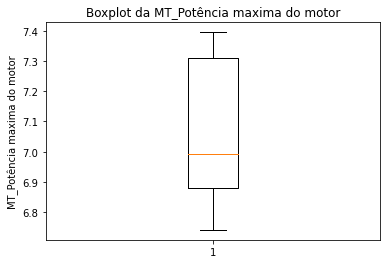

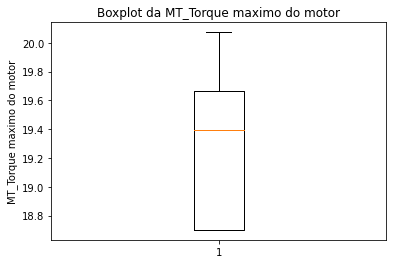

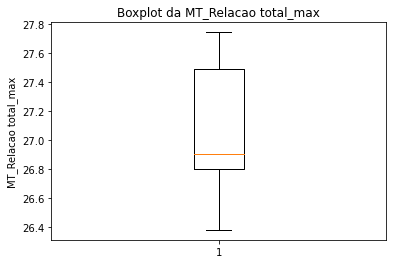

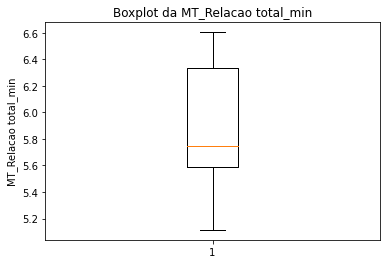

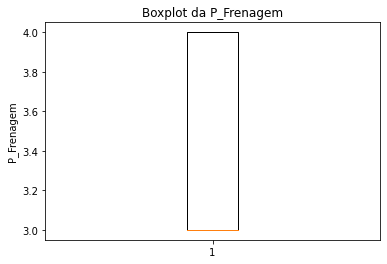

In [23]:
# Boxplot
for coluna in data_sem_outliers.columns:          # Loop para gerar boxplots para cada variável
    plt.boxplot(data_sem_outliers[coluna])
    plt.title(f'Boxplot da {coluna}')
    plt.ylabel(coluna)
    plt.show()

In [22]:
iqr_limit = 0.5

def remove_outliers(df, iqr_limit=0.5):
    outliers_removed = df.copy()
    for coluna in df.columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_limit * IQR
        upper_bound = Q3 + iqr_limit * IQR
        outliers_removed = outliers_removed[(outliers_removed[coluna] >= lower_bound) & (outliers_removed[coluna] <= upper_bound)]
    return outliers_removed

data_sem_outliers = remove_outliers(df, iqr_limit)

In [24]:
data_corr = df.drop(['P_Frenagem'], axis=1)
# Análise de correlação dos parâmetros
correlation = df.corr()

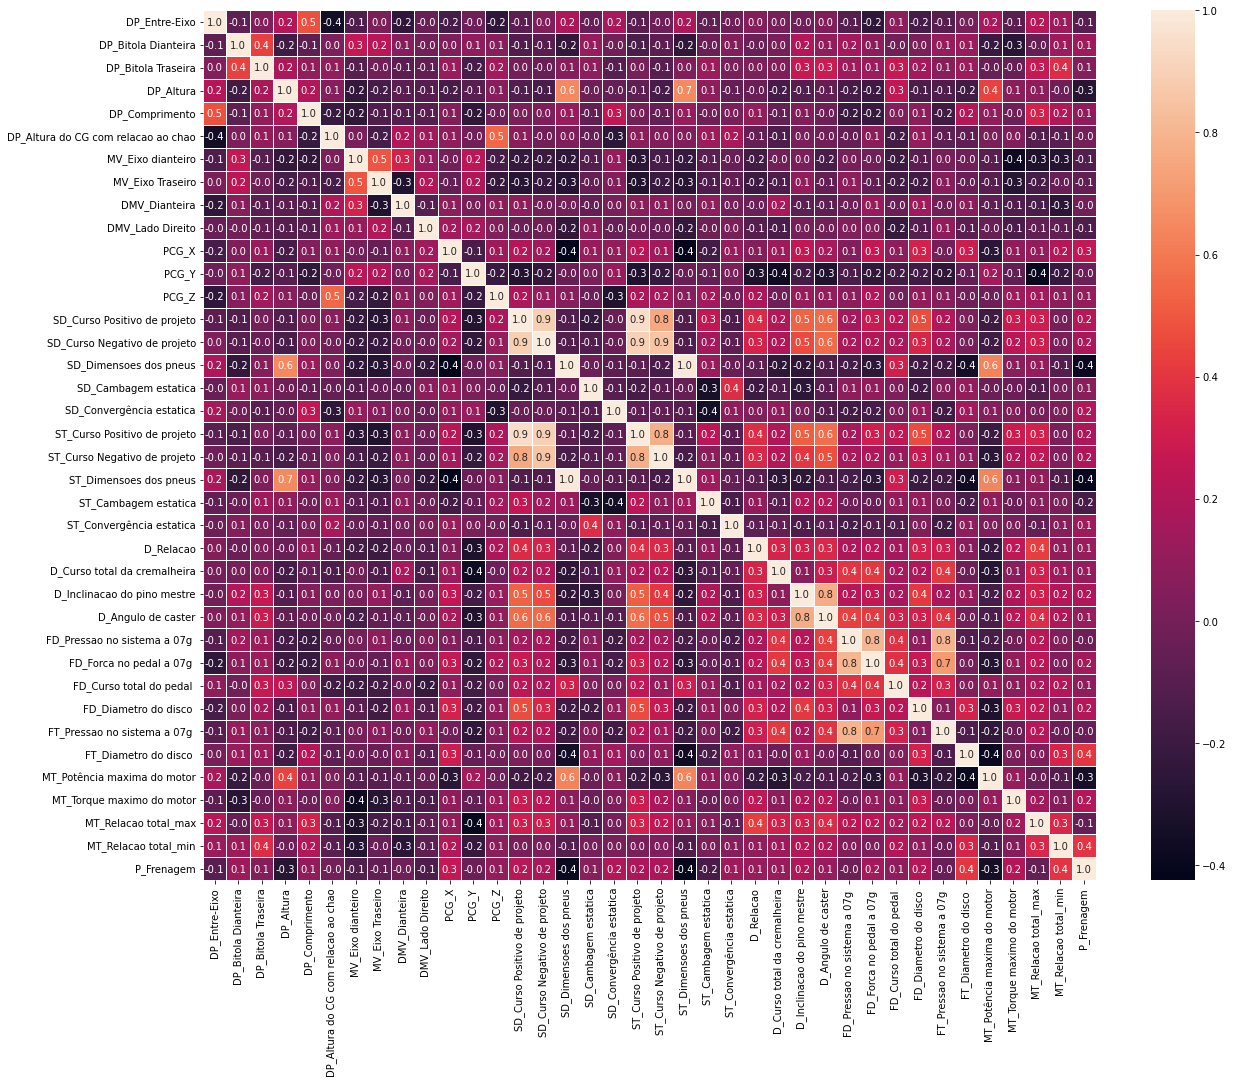

In [25]:
# Plot da matriz de correlação
plt.figure(figsize=(20, 16))

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=0.5)
plt.show()

In [44]:
# Selecionar as duas variáveis a serem reduzidas (Variavel1 e Variavel2)
variaveis_reduzidas = df[['ST_Curso Positivo de projeto', 'ST_Curso Negativo de projeto', 'SD_Curso Negativo de projeto', 'ST_Curso Positivo de projeto']]

# Aplicar PCA para reduzir as duas variáveis em uma única variável
pca = PCA(n_components=1)
variavel_reduzida = pca.fit_transform(variaveis_reduzidas)



# Adicione a variável reduzida de volta ao DataFrame original
df['Curso de Projeto'] = variavel_reduzida

df = df.drop(['ST_Curso Positivo de projeto'], axis=1)
df = df.drop(['ST_Curso Negativo de projeto'], axis=1)
df = df.drop(['SD_Curso Negativo de projeto'], axis=1)
df = df.drop(['SD_Curso Positivo de projeto'], axis=1)
df = df.drop(['SD_Dimensoes dos pneus'], axis=1)

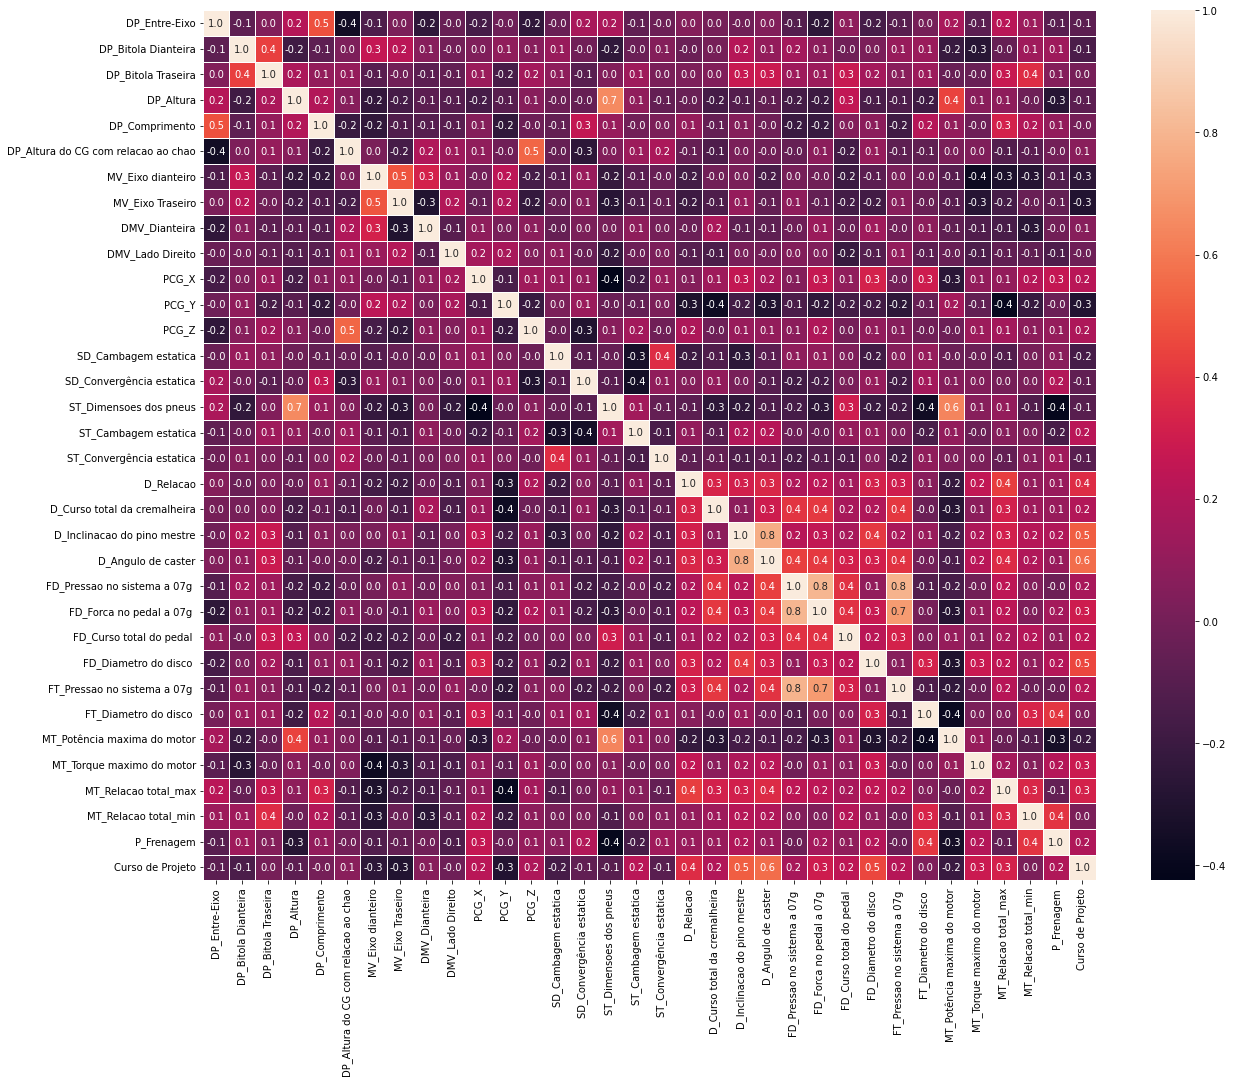

In [45]:
# Análise de correlação dos parâmetros
correlation = df.corr()

# Plot da matriz de correlação
plt.figure(figsize=(20, 16))

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=0.5)
plt.show()

In [ ]:
# Dividir o conjunto de dados em treinamento e teste
np.random.seed(456)  # Outra semente para divisão aleatória
dados_treino, dados_teste = train_test_split(dados, test_size=0.3)

# Separar X e Y
X = dados[['Covariate1', 'Covariate2']]
Y = dados['Nota']

X_treino = dados_treino[['Covariate1', 'Covariate2']]
Y_treino = dados_treino['Nota']

X_teste = dados_teste[['Covariate1', 'Covariate2']]
Y_teste = dados_teste['Nota']

print(dados_treino)

# Escolha do Modelo

## Regressão Logística:

In [ ]:
# Modelo de regressão logística.
model_LR = LogisticRegression()
model_LR.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo.
Y_pred = model_LR.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Regressão Logística:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Máquinas de Vetores de Suporte (SVM)

In [ ]:
# Modelo SVM com um kernel linear e "um contra todos"
model_SVM = SVC(kernel='linear', decision_function_shape='ovr')
model_SVM.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo.
Y_pred = model_SVM.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Máquinas de Vetores de Suporte:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## K-Nearest Neighbors

In [ ]:
k = 3  # Número de vizinhos (Altere por necessidade)

# Modelo de K-Vizinhos Mais Próximos (K-Nearest Neighbors - KNN).
model_KNN = KNeighborsClassifier(n_neighbors=k)
model_KNN.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_KNN.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para K-Vizinhos Mais Próximos:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Decision Tree Classifier

In [ ]:
# Modelo de Árvore de Decisão de Classificação.
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_DTC.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Árvore de Decisão de Classificação:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Random Forest Classifier

In [ ]:
# Modelo de Regressão de Floresta Aleatória.
model_RFC = RandomForestClassifier()
model_RFC.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo.
Y_pred = model_RFC.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Regressão de Floresta Aleatória:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos.
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## XGBoost

In [ ]:
# Modelo de Extreme Gradient Boosting.
model_XGB = XGBClassifier()
model_XGB.fit(X_treinamento, y_treinamento)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_XGB.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Extreme Gradient Boosting:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

# Treinamento do Modelo

## Bootstraps

In [ ]:
n_iterations = 100  # Número de iterações do Bootstrap

# Lista para armazenar as métricas de desempenho em cada iteração
performance_metrics = []

for _ in range(n_iterations):
    # Amostragem Bootstrap: crie um conjunto de treinamento com reamostragem
    indices_amostra = np.random.choice(len(X_treino), size=len(X_treino), replace=True)
    X_bootstrap = X_treino[indices_amostra]
    y_bootstrap = Y_treino[indices_amostra]

    # Crie e treine seu modelo
    model_XGB.fit(X_bootstrap, y_bootstrap)

    # Avalie o modelo no conjunto de teste
    desempenho = model_XGB.score(X_teste, Y_teste)  # Use a métrica apropriada para o seu problema
    performance_metrics.append(desempenho)

In [ ]:
# Calcule as métricas resumidas (por exemplo, média e desvio padrão)
media_desempenho = np.mean(performance_metrics)
desvio_padrao_desempenho = np.std(performance_metrics)

# Imprima as métricas resumidas
print(f'Média do desempenho: {media_desempenho:.4f}')
print(f'Desvio Padrão do desempenho: {desvio_padrao_desempenho:.4f}')

# Avaliação do Modelo

## Cross-Validation

In [ ]:
# Número de classes
n_classes = 5

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#kfold = StratifiedKFold(n_splits = 5, shuffle = True) # Caso uma classe prevaleça muita em função da outra

In [ ]:
# Calcule a média das pontuações para avaliação de Acurácia do modelo
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean * 100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2 * dv) * 100, (mean + 2 * dv) * 100)

scores = cross_val_score(model_XGB, X_treino, Y_treino, cv=kfold, scoring='accuracy') # Checar Modelo
intervalo(scores)

In [ ]:
# Calcule a média das pontuações para avaliação de Precisão do modelo
def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean * 100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2 * dv) * 100, (mean + 2 * dv) * 100)

scores = cross_val_score(model_XGB, X_treino, Y_treino, cv=kfold, scoring='precision_macro') # Checar Modelo
intervalo_prec(scores)

In [ ]:
# Calcule a média das pontuações para avaliação de Recall do modelo
def intervalo_recall(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean * 100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2 * dv) * 100, (mean + 2 * dv) * 100)

scores = cross_val_score(model_XGB, X_treino, Y_treino, cv=kfold, scoring='recall_macro') # Checar Modelo
intervalo_recall(scores)

In [ ]:
# Comparar scores de Previsão e Recall
y_scores = cross_val_predict(model_XGB, X_treino, Y_treino, cv=kfold, method='predict_proba')

precisions, recalls, thresholds = precision_recall_curve(Y_treino, y_scores, pos_label=1) # Certifique-se de especificar a classe positiva correta

fig, ax = plt.subplots(figsize=(12, 3))
plt.plot(thresholds, precisions, 'b--', label='Precisão')
plt.plot(thresholds, recalls, 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='center right')
plt.ylim([0, 1])
plt.title('Precisão x Recall', fontsize=14)
plt.show()

In [ ]:
# Matriz de Confusão
Y_pred = cross_val_predict(model_XGB, X_treino, Y_treino, cv=kfold) # Checar Modelo

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_treino, Y_pred), annot=True, ax=ax, fmt='d', cmap='Reds', cbar=False, square=True)
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [ ]:
# Relatório do modelo
print('Relatório de classificação:\n', classification_report(Y_treino, Y_pred, digits=4))

In [ ]:
# Receiver operating characteristic — ROC
fpr, tpr, thresholds = roc_curve(Y_treino, y_scores[:, 1]) # Certifique-se de especificar a classe positiva correta

fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(fpr, tpr, linewidth=2, label='Logistic Regression') # Checar Modelo
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.title('Curva ROC', fontsize=14)
plt.show()

In [ ]:
# Área sob a Curva
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(Y_treino, y_scores, multi_class='ovr', average='macro'))

In [ ]:
# Treinamento do modelo 
model_XGB.fit(X_treino, Y_treino) # Checar modelo

# Fazer previsões no conjunto de teste
Y_pred_teste = model_XGB.predict(X_teste)

# Acurácia no conjunto de teste
accuracy = accuracy_score(Y_teste, Y_pred_teste)
print('Acurácia no conjunto de teste: {:.2f}%'.format(accuracy * 100))

# Precisão no conjunto de teste
precision = precision_score(Y_teste, Y_pred_teste, average='macro')
print('Precisão no conjunto de teste: {:.2f}%'.format(precision * 100))

# Recall no conjunto de teste
recall = recall_score(Y_teste, Y_pred_teste, average='macro')
print('Recall no conjunto de teste: {:.2f}%'.format(recall * 100))

# Relatório de classificação no conjunto de teste
print('Relatório de classificação no conjunto de teste:\n', classification_report(Y_teste, Y_pred_teste, digits=4))

## Análise de Variáveis 

In [ ]:
# Analisar variáveis que mais afetam o modelo
importances = model_XGB.feature_importances_

# Classifique as importâncias das características
indices_ordenados = np.argsort(importances)[::-1]

print(importances)

In [ ]:
# Analisar como uma variável afeta as previsões
features_to_plot = [['Covariate1', 'Covariate2']]

# Crie PDPs para as variáveis escolhidas
plot_partial_dependence(model_XGB, X_treino, features=features_to_plot)
plt.show()

In [ ]:
# Crie um objeto explainer
explainer = shap.Explainer(model_XGB, X_treino)

# Calcule os valores Shapley para um exemplo de dado específico
shap_values = explainer.shap_values(X_teste)

# Visualize os valores Shapley
shap.summary_plot(shap_values, X_teste)

# Aprimoramento de Parâmetros

## Tuning

In [ ]:
# Exemplo de Tuning
param_grid = {
    'n_estimators': [10, 20, 30],           # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],        # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],        # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4],          # Número mínimo de amostras em uma folha
    'max_features': ['auto', 'sqrt']        # Número máximo de recursos a serem considerados em cada divisão
}

grid_search = GridSearchCV(estimator=model_XGB, param_grid=param_grid, cv=5)

grid_search.fit(X_treino, Y_treino)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
# Ajustar um modelo de RandomForestRegressor
model_XGB.fit(X_treino, Y_treino)

# Configure o modelo com os melhores parâmetros
model_XGB.set_params(**best_params)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_XGB.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Extreme Gradient Boosting:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

## Redução de Dimensão

In [ ]:
# Selecione um número específico de características mais importantes
num_caracteristicas_selecionadas = 3  # Por exemplo, selecione as 3 mais importantes

X_treino_selecionado = X_treino[:, indices_ordenados[:num_caracteristicas_selecionadas]]
X_teste_selecionado = X_teste[:, indices_ordenados[:num_caracteristicas_selecionadas]]

# Em seguida, treine seu modelo no conjunto de dados com características selecionadas
model_XGB.fit(X_treino_selecionado, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_XGB.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Extreme Gradient Boosting:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

# Predição

In [ ]:
# Valor único para fazer a previsão
X_prev = np.array([6]).reshape(-1, 1) # Colocar os valores pedidos

# Faça a previsão
previsao = modelo_carregado.predict(X_prev)

# Imprima a previsão
print(f'A previsão para X_prev é: {previsao[0]:.2f}')